<H1>Prosper Loan Exploratory Data Analysis<H1>
<BR>Project Dataset : Prosper Loan Data
<BR>By:Mohamed Zaky
<BR>2021-05-25

**Prosper is a money lending platform which helps in reducing the distance between the borrower and lender.**

<br>
<h3>I conducted a Data Analysis on a data set from Prosper</h3>
<h4>(I use Data Visualization , for exploratory and explanatory data analysis.)
</h4>
<h4>    
(I use univariate, bivariate and multivariate visualization techniques to identify variables behaviour and relationships between variables.)
</h4>

<br>This data set contains 113,937 loans with 81 variables on each loan, 
<br>including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others
<br>This data dictionary explains the variables in the data set.
<br>You are not expected to explore all of the variables in the dataset! Focus your exploration on about 10-15 of them.
<br>Loan Data from Prosper, (Last updated 03/11/2014)

<br> i'm going to limit the variables to explore data and report findings.




<br><h3>variables in study</h3> 
<table  style="width:100%">
<tr>
<th>Variable</th>
<th>Description</th>
</tr>

<tr>
<td>ListingKey</td>
<td>Unique key for each listing, same value as the 'key' used in the listing object in the API.</td>
</tr>
<tr>
<td>ListingCreationDate</td>
<td>The date the listing was created.</td>
</tr>
<tr>
<td>Term</td>
<td>The length of the loan expressed in months.</td>
</tr>
<tr>
<td>LoanStatus</td>
<td>The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.</td>
</tr>
<tr>
<td>BorrowerAPR</td>
<td>The Borrower's Annual Percentage Rate (APR) for the loan.</td>
</tr>
<tr>
<td>BorrowerRate</td>
<td>The Borrower's interest rate for this loan.</td>
</tr>    
    

    
<tr>
<td>ListingCategory (numeric)</td>
<td>The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans</td>
</tr>
<tr>
<td>EstimatedReturn</td>
<td>The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.</td>
</tr>
<tr>
<td>LenderYield</td>
<td>The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.</td>
</tr>
<tr>
<td>EmploymentStatus</td>
<td>The employment status of the borrower at the time they posted the listing.</td>
</tr>
<tr>
<td>IsBorrowerHomeowner</td>
<td>A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.</td>
</tr>
<tr>
<td>CreditScoreRangeLower</td>
<td>The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.</td>
</tr>
    
<tr>
<td>LoanMonthsSinceOrigination</td>
<td>Number of months since the loan originated.</td>
</tr>
    
    
<tr>
<td>LoanOriginalAmount</td>
<td>The origination amount of the loan.</td>
</tr>
    
<tr>
<td>IncomeRange</td>
<td>The income range of the borrower at the time the listing was created.</td>
</tr>    
    
<tr>
<td>MonthlyLoanPayment</td>
<td>The scheduled monthly loan payment.</td>
</tr>

</table>


<BR>
<H3>steps included</H3> 
<BR><a href='#univariate'>Univariate Plots Section, Analysis</a>
    <BR><a href='#Bivariate'>Bivariate Plots Section, Analysis</a>
        <BR><a href='#Multivariate'>Multivariate Plots Section, Analysis</a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
#%matplotlib inline

# Read the data from a CSV file
df_raw = pd.read_csv('prosperLoanData.csv')
df = df_raw[['ListingKey', 'ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR','BorrowerRate', 'ListingCategory (numeric)', 'EstimatedReturn', 'LenderYield', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'LoanMonthsSinceOrigination', 'LoanOriginalAmount', 'IncomeRange', 'MonthlyLoanPayment']]
# drop null credit score and Employment Status null values, and so estimated Return
df = df.dropna(subset = ['CreditScoreRangeLower', 'EmploymentStatus'], how = 'any' )
#df = df.dropna(subset = ['CreditScoreRangeLower', 'EmploymentStatus', 'EstimatedReturn'], how = 'any' )


#function to plot univariant 
def plot_func(func_df, binvar,xvar, title, xlabel, ylabel):
    #binsize = 0.005
    binsize = binvar
    #binmax = df.BorrowerAPR.max()
    binmax = func_df[xvar].max()
    bins = np.arange(0, binmax+binsize, binsize)
    plt.figure(figsize=[8, 5])
    plt.hist(data = func_df, x= xvar, bins = bins);
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #plt.xlim(0, 0.25)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111680 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ListingKey                  111680 non-null  object 
 1   ListingCreationDate         111680 non-null  object 
 2   Term                        111680 non-null  int64  
 3   LoanStatus                  111680 non-null  object 
 4   BorrowerAPR                 111680 non-null  float64
 5   BorrowerRate                111680 non-null  float64
 6   ListingCategory (numeric)   111680 non-null  int64  
 7   EstimatedReturn             84853 non-null   float64
 8   LenderYield                 111680 non-null  float64
 9   EmploymentStatus            111680 non-null  object 
 10  IsBorrowerHomeowner         111680 non-null  bool   
 11  CreditScoreRangeLower       111680 non-null  float64
 12  LoanMonthsSinceOrigination  111680 non-null  int64  
 13  LoanOriginalAm

In [36]:
#DataSet 
df.head()

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),EstimatedReturn,LenderYield,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,LoanMonthsSinceOrigination,LoanOriginalAmount,IncomeRange,MonthlyLoanPayment
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0,NaN,0.1380,Self-employed,True,640.0,78,9425,"$25,000-49,999",330.43
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,2,0.05470,0.0820,Employed,False,680.0,0,10000,"$50,000-74,999",318.93
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,0,NaN,0.2400,Not available,False,480.0,86,3001,Not displayed,123.32
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,16,0.06000,0.0874,Employed,True,800.0,16,10000,"$25,000-49,999",321.45
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,2,0.09066,0.1985,Employed,True,680.0,6,15000,"$100,000+",563.97


In [5]:
#check for null values in data
df.isnull().sum()

ListingKey                        0
ListingCreationDate               0
Term                              0
LoanStatus                        0
BorrowerAPR                       0
BorrowerRate                      0
ListingCategory (numeric)         0
EstimatedReturn               26827
LenderYield                       0
EmploymentStatus                  0
IsBorrowerHomeowner               0
CreditScoreRangeLower             0
LoanMonthsSinceOrigination        0
LoanOriginalAmount                0
IncomeRange                       0
MonthlyLoanPayment                0
dtype: int64

In [6]:
# drop null credit score and Employment Status null values 
df = df.dropna(subset = ['CreditScoreRangeLower', 'EmploymentStatus'], how = 'any' )

In [7]:
# convert Credit Score into ordered categorical values

# Bin edges 
bin_edges = [-1, 1, 579, 669, 739, 799, 900] 

# Labels for our credit scores
bin_names = ['Not Available', 'Very Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']

# Create CreditScore column
df['CreditScore'] = pd.cut(df['CreditScoreRangeLower'], bin_edges, labels=bin_names)

# Let's take a randon sample to see if our categories work
df.sample(5)

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),EstimatedReturn,LenderYield,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,LoanMonthsSinceOrigination,LoanOriginalAmount,IncomeRange,MonthlyLoanPayment,CreditScore
89346,DFAE3564036247827765473,2012-11-18 21:28:58.177000000,60,Completed,0.23656,0.2118,8,0.12460,0.2018,Employed,True,720.0,16,15000,"$100,000+",407.32,Good
30055,B9A63563737697017E4C4AB,2012-11-14 12:14:08.467000000,60,Current,0.34408,0.3165,1,0.13630,0.3065,Employed,True,680.0,16,7963,"$50,000-74,999",265.77,Good
78932,F8833575891843737CA8CB0,2013-04-12 18:18:57.170000000,36,Current,0.29537,0.2566,1,0.10790,0.2466,Employed,True,660.0,11,10000,"$100,000+",401.10,Fair
44059,C505359997275321950B908,2014-01-19 13:17:30.920000000,36,Current,0.14714,0.1189,7,0.06706,0.1089,Full-time,True,680.0,1,10000,"$50,000-74,999",331.62,Good
3326,8B003585751635412A08AF1,2013-08-13 06:11:25.907000000,36,Current,0.25013,0.2124,1,0.09990,0.2024,Employed,False,640.0,7,15000,"$100,000+",566.98,Fair


In [8]:
# from the file which define variables, we can create new varaibles with 

In [9]:
df['ListingCategory (numeric)'] = df['ListingCategory (numeric)'].replace({
    0: 'Not Available',
    1: 'Debt Consolidation',
    2: 'Home Improvement',
    3: 'Business',
    4: 'Personal Loan',
    5: 'Student Use',
    6: 'Auto',
    7: 'Other',
    8: 'Baby&Adoption',
    9: 'Boat',
    10: 'Cosmetic Procedure',
    11: 'Engagement Ring',
    12: 'Green Loans',
    13: 'Household Expenses',
    14: 'Large Purchases',
    15: 'Medical/Dental',
    16: 'Motorcycle',
    17: 'RV',
    18: 'Taxes',
    19: 'Vacation',
    20: 'Wedding Loans'})

In [10]:
# Rename the column to show its numeric
df['ListingCategory'] = df['ListingCategory (numeric)']

In [11]:
# convert Term, IncomeRange, CreditScoreRangeLower, into ordered categorical types
ordinal_var_dict = {
                    'Term':        [12, 36, 60],
                    'IncomeRange': ['Not employed', 'Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                    '$75,000-99,999', '$100,000+'],
                    'CreditScore': ['Very Poor', 'Fair', 'Good', 'Very Good', 'Exceptional'],
                    'LoanStatus':  ['Completed', 'Current', 'FinalPaymentInProgress', 'Defaulted', 'Chargedoff', 'Cancelled',
                                    'Past Due (1-15 days)',  'Past Due (16-30 days)',  'Past Due (31-60 days)', 
                                    'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']
                    }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

<h2><a id='univariate'>Univariate Plots Section, Analysis</a></h2>

<h3>Distribution of Borrower APR</h3><br>
Borrower APR is slightly skewed to the left and range from 0.006 to 0.42. We can see some peaks throughout the whole distribution, the most obvious one being at 0.35. This seems to show that there are certain preconstructed borrower annual percentage rates, the most common one being 0.35.

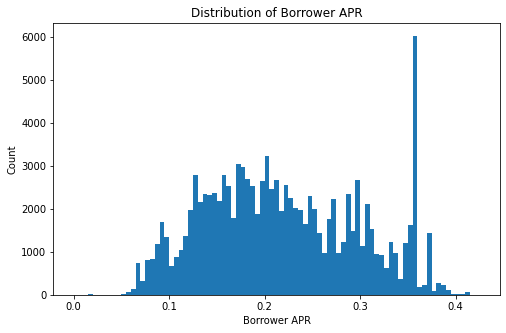

In [12]:
plot_func(df,0.005, 'BorrowerAPR', 'Distribution of Borrower APR', 'Borrower APR', 'Count')

<h3>Estimated Return</h3><br>
Estimated Returns more or less follows a normal distribution. 
Return rates range from -0.18 to 0.28. Anything over 0.15 is very rare. The average return for a loan is 0.0961.

-0.1827 0.2837 0.09606829611209974


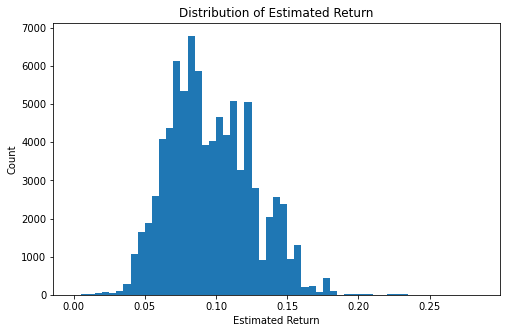

In [13]:
print(df['EstimatedReturn'].min(), df['EstimatedReturn'].max(), df['EstimatedReturn'].mean())
plot_func(df,0.005, 'EstimatedReturn', 'Distribution of Estimated Return', 'Estimated Return', 'Count')

<h3>Loan Months Since Origination</h3>

Min.: 0 , Max. : 94 ,The Avg. 30.65868553008596


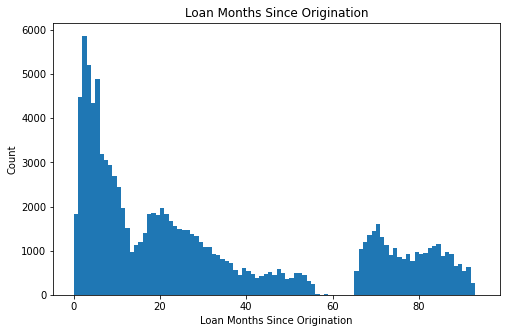

In [14]:
print('Min.:',df['LoanMonthsSinceOrigination'].min(), ', Max. :',df['LoanMonthsSinceOrigination'].max(), ',The Avg.', df['LoanMonthsSinceOrigination'].mean())
plot_func(df,1, 'LoanMonthsSinceOrigination', 'Loan Months Since Origination', 'Loan Months Since Origination', 'Count')

<h3>Loan Original Amount</h3><BR>
There's a long tail in the distribution, so we made this graph on a log scale. Loans can range from 1000\$ (the minimum amount in the dataset) to 35,000\\$. The graph indicates that some loan amounts are much more popular than others.

Min. Amount: 1000 , Max. Amount: 35000 ,The Avg. 8413.293212750716


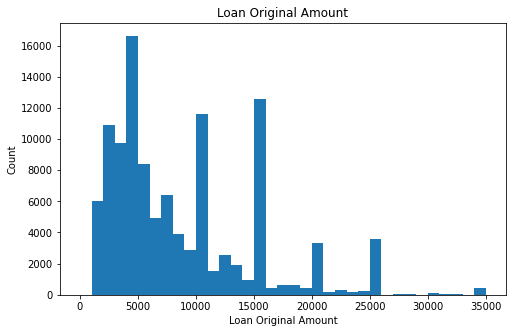

In [15]:
print('Min. Amount:',df['LoanOriginalAmount'].min(), ', Max. Amount:',df['LoanOriginalAmount'].max(), ',The Avg.', df['LoanOriginalAmount'].mean())
plot_func(df,1000, 'LoanOriginalAmount', 'Loan Original Amount', 'Loan Original Amount', 'Count')

(600.0, 50000.0)

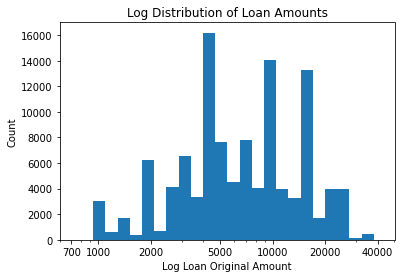

In [16]:
#plot on log scale
log_binsize = 0.07
bins = 10 ** np.arange(1.5, np.log(df.LoanOriginalAmount.max())+log_binsize, log_binsize)
ticks = [500, 700, 1000, 2000, 5000, 10000, 20000, 40000]

plt.hist(data = df, x= 'LoanOriginalAmount', bins = bins);

plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Log Loan Original Amount')
plt.ylabel('Count')
plt.title('Log Distribution of Loan Amounts')
plt.xlim(600, 50000)

<h3>Monthly Loan Payment</h3><br>
We also used log scale for this graph. This allows us to better understand the distribution of loans between 100 and 500\$. A commmon loan payment is around 175\\$ / month. The median monthly payment is \$217, less than the mean of \\$272, so the distribution skews toward smaller monthly payments. No payment is more than \$2,252, but that appears to be a signficant outlier. There are very few payments above \\$1,000.

Text(0.5, 0, 'Monthly Loan Payment')

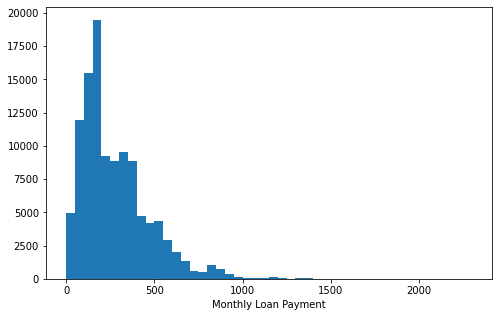

In [17]:

binsize = 50
bins = np.arange(0, df.MonthlyLoanPayment.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x= 'MonthlyLoanPayment', bins = bins);
plt.xlabel('Monthly Loan Payment')

In [18]:
#Let's use a log scale for Monthly Loan Payment as well.

(20.0, 2500.0)

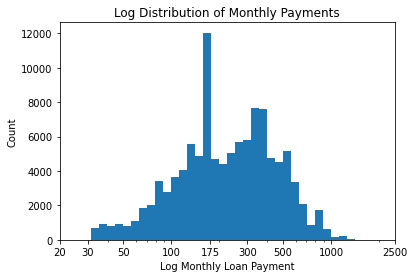

In [19]:
log_binsize = 0.05
bins = 10 ** np.arange(1.5, np.log(df.MonthlyLoanPayment.max())+log_binsize, log_binsize)
ticks = [20, 30, 50, 100, 175, 300, 500, 1000, 2500]

plt.hist(data = df, x= 'MonthlyLoanPayment', bins = bins);

plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Log Monthly Loan Payment')
plt.ylabel('Count')
plt.title('Log Distribution of Monthly Payments')
plt.xlim(20, 2500)

<h3>Ordinal Variables  </h3><br>
Term, Income Range and Credit Score
Most loans are 36 month terms in this dataset, and borrowers' income are mostly below 75,000\$ per year.

Overall, it appears that a large majority of loans are either Completed or Current, though there are also a large number of Charged-off and Defaulted (non-performing).  later I will look at loans performance.

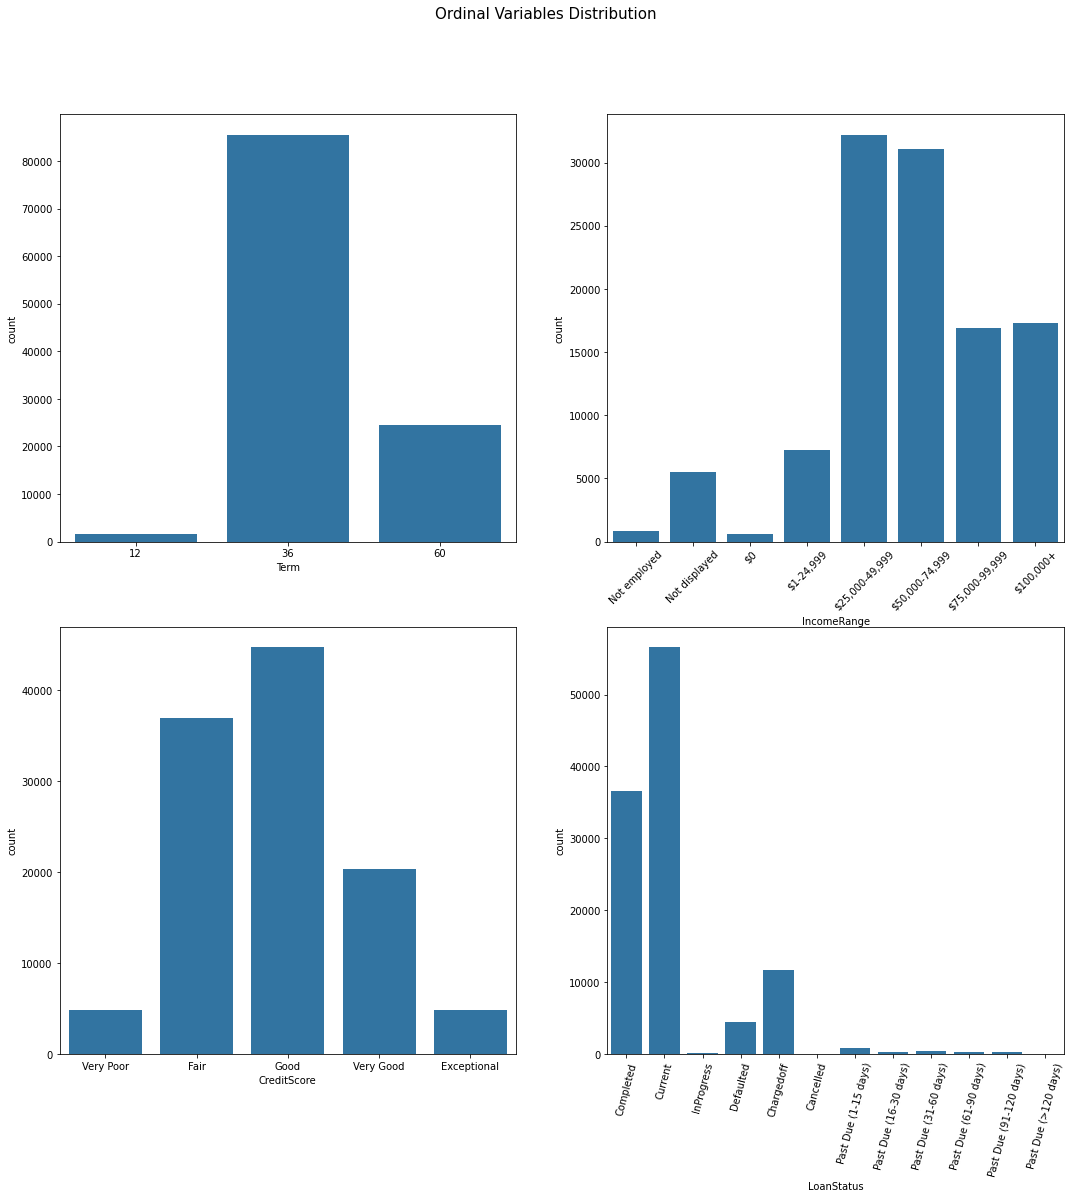

In [21]:
# let's plot all four ordinary variables together to get an idea of each distribution.

IncomeRange_labels = ['Not employed', 'Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                    '$75,000-99,999', '$100,000+']
LoanStatus_labels = ['Completed', 'Current', 'InProgress', 'Defaulted', 'Chargedoff', 'Cancelled',
                                    'Past Due (1-15 days)',  'Past Due (16-30 days)',  'Past Due (31-60 days)', 
                                    'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']


fig, ax = plt.subplots(nrows=2 , ncols = 2, figsize = [18,15])

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Term', color = default_color, ax = ax[0, 0])
sb.countplot(data = df, x = 'IncomeRange', color = default_color, ax = ax[0, 1])
sb.countplot(data = df, x = 'CreditScore', color = default_color, ax = ax[1, 0])
sb.countplot(data = df, x = 'LoanStatus', color = default_color, ax = ax[1, 1])

ax[0,1].set_xticklabels(labels = IncomeRange_labels, rotation = 45)
ax[1,1].set_xticklabels(labels = LoanStatus_labels, rotation = 75)

plt.subplots_adjust(bottom = 0.01)
fig.suptitle("Ordinal Variables Distribution", fontsize=15)

plt.show()

<h3>Listing Categories</h3><br>
The most common listing category is by far Debt Consolidation. Other popular ones inclure Home Improvement, Auto, Business, and Other.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Not Available'),
  Text(1, 0, 'Home Improvement'),
  Text(2, 0, 'Motorcycle'),
  Text(3, 0, 'Debt Consolidation'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Household Expenses'),
  Text(6, 0, 'Auto'),
  Text(7, 0, 'Medical/Dental'),
  Text(8, 0, 'Wedding Loans'),
  Text(9, 0, 'Vacation'),
  Text(10, 0, 'Business'),
  Text(11, 0, 'Taxes'),
  Text(12, 0, 'Baby&Adoption'),
  Text(13, 0, 'Personal Loan'),
  Text(14, 0, 'Engagement Ring'),
  Text(15, 0, 'Large Purchases'),
  Text(16, 0, 'Student Use'),
  Text(17, 0, 'Boat'),
  Text(18, 0, 'RV'),
  Text(19, 0, 'Cosmetic Procedure'),
  Text(20, 0, 'Green Loans')])

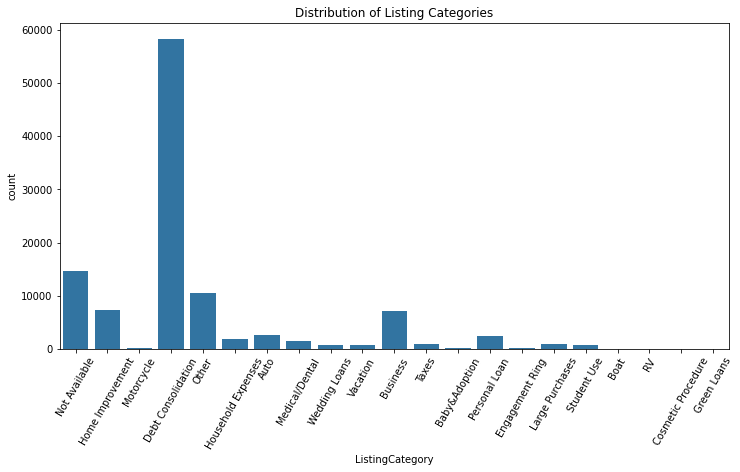

In [22]:

plt.figure(figsize = [12, 6])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'ListingCategory', color = default_color)
plt.title('Distribution of Listing Categories')
plt.xticks(rotation = 60)

<h2><a id='Bivariate'>Bivariate Plots Section, Analysis</a></h2>

<h3>Estimated Return VS Loan Original Amount & Estimated Return VS Loan Months Since Origination</h3><br>

<ipython-input-23-2d7d712f4beb>:24: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[0].set_xticks(log_trans(np.array(ticks)), ticks)
<ipython-input-23-2d7d712f4beb>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels('Log Loan Original Amount');


Text(0.5, 1.0, 'Estimated Return based on number of months of the loan')

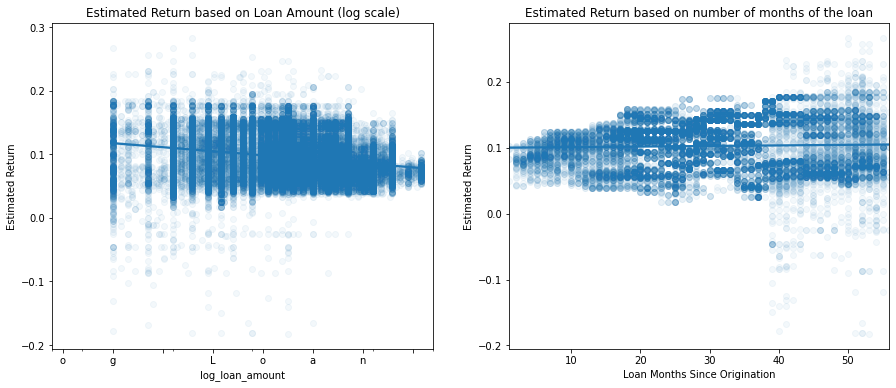

In [23]:
# log function to easily transform data to its log values
def log_trans(x, inverse = False):
    if not inverse:
        
        return np.log10(x)
    else:
        return np.power(10, x)

# Create a new column that has the log values of 'LoanOriginalAmount'
df['log_loan_amount'] = df['LoanOriginalAmount'].apply(log_trans)

# take only the completed loans
df2_completed = df.query('LoanStatus == "Completed"')

# Create visualization
fig, ax = plt.subplots(ncols = 2, figsize = [15,6])
ticks = [500, 700, 1000, 2000, 5000, 10000, 20000, 40000]

base_color = sb.color_palette()[0]

# First graph
sb.regplot(data = df, x= 'log_loan_amount', y = 'EstimatedReturn', scatter_kws={'alpha':0.05}, ax = ax[0]);

ax[0].set_xticks(log_trans(np.array(ticks)), ticks)
ax[0].set_xticklabels('Log Loan Original Amount');
ax[0].set_ylabel('Estimated Return')
ax[0].set_title('Estimated Return based on Loan Amount (log scale)')

# Second graph
sb.regplot(data = df2_completed, x= 'LoanMonthsSinceOrigination', y = 'EstimatedReturn', scatter_kws={'alpha':0.05}, ax = ax[1], color = base_color);

ax[1].set_xlabel('Loan Months Since Origination');
ax[1].set_ylabel('Estimated Return')
ax[1].set_title('Estimated Return based on number of months of the loan')

At Left Plot: there is a negative correlation between the Estimated Return and the log of the Loan Amount. On average smaller loans tend to yield higher returns. However, there is also more variability in returns for the smaller the loan so this means that there is more risk associated with smaller loans.

**Insight :** If we invest multiple times in different loans, we would yield more returns with smaller loans. For a safer, one time bet, a higher loan would be more appropriate.

At Right Plot: The duration of the loan seems to have no impact on return. We can see from this graph however that longer loans are riskier since they have higher variability in return.

**Insight :** Longer term loans are more risky because they have more variability. On average however, the length of the loan has no impact of estimated returns.


<h3>Estimated Returns VS Listing Category</h3><br>

In [24]:
THRESHOLD = 500
loan_frequency = df['ListingCategory'].value_counts()
idx = np.sum(loan_frequency > THRESHOLD)

most_loans = loan_frequency.index[:idx]
df2_topcategories = df.loc[df['ListingCategory'].isin(most_loans)]

loan_mean = df2_topcategories.groupby('ListingCategory').mean()

# List our categories with over 500 loans of that type
df2_topcategories['ListingCategory'].value_counts()

Debt Consolidation    58308
Not Available         14708
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Name: ListingCategory, dtype: int64


There are 20 different listing categories, some of which are not represented much. For the next graph, we're only taking the listing categories where there are over 500 loans in the dataset. Otherwise we might get some incomplete information about the loan.

**Insight:** Investing in a Home Improvement loan and a large purchase loan, is slightly less profitable than the others on average.

<h3>BorrowerAPR and Estimated Return VS Credit Score and Income Range</h3><br>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Not Available'),
  Text(1, 0, 'Home Improvement'),
  Text(2, 0, 'Debt Consolidation'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Household Expenses'),
  Text(5, 0, 'Auto'),
  Text(6, 0, 'Medical/Dental'),
  Text(7, 0, 'Wedding Loans'),
  Text(8, 0, 'Vacation'),
  Text(9, 0, 'Business'),
  Text(10, 0, 'Taxes'),
  Text(11, 0, 'Personal Loan'),
  Text(12, 0, 'Large Purchases'),
  Text(13, 0, 'Student Use')])

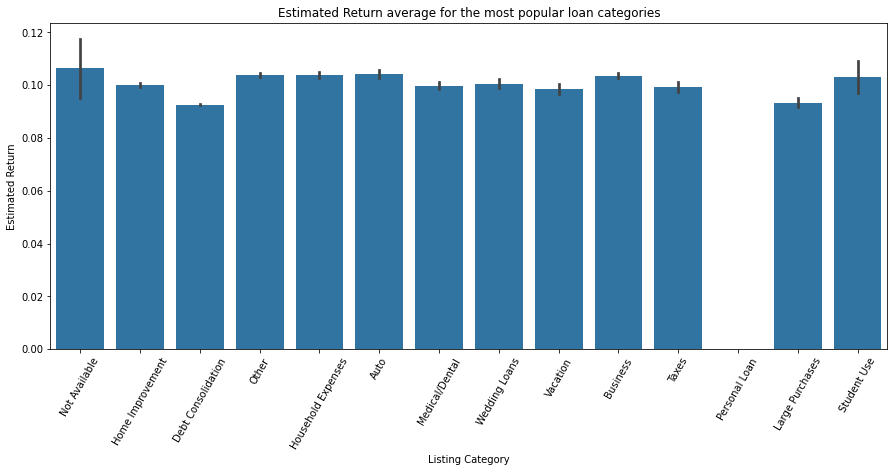

In [25]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [15, 6])
sb.barplot(data = df2_topcategories, x = 'ListingCategory', y = 'EstimatedReturn', color = base_color)
plt.title('Estimated Return average for the most popular loan categories')
plt.xlabel('Listing Category')
plt.ylabel('Estimated Return')
plt.xticks(rotation = 60)

The average borrower APR becomes lower with better credit scores. Having an Exceptional credit score really makes a difference! The same thing can be said for income bracket, although the difference is less reveling.

Loaning to borrowers that have lower incomes and lower credit scores yield slightly higher returns.

**Insight:** Having an exceptional credit score makes a huge difference in the APR one can get.

<h3>BorrowerAPR and Estimated Return VS Term</h3>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

<Figure size 1296x720 with 0 Axes>

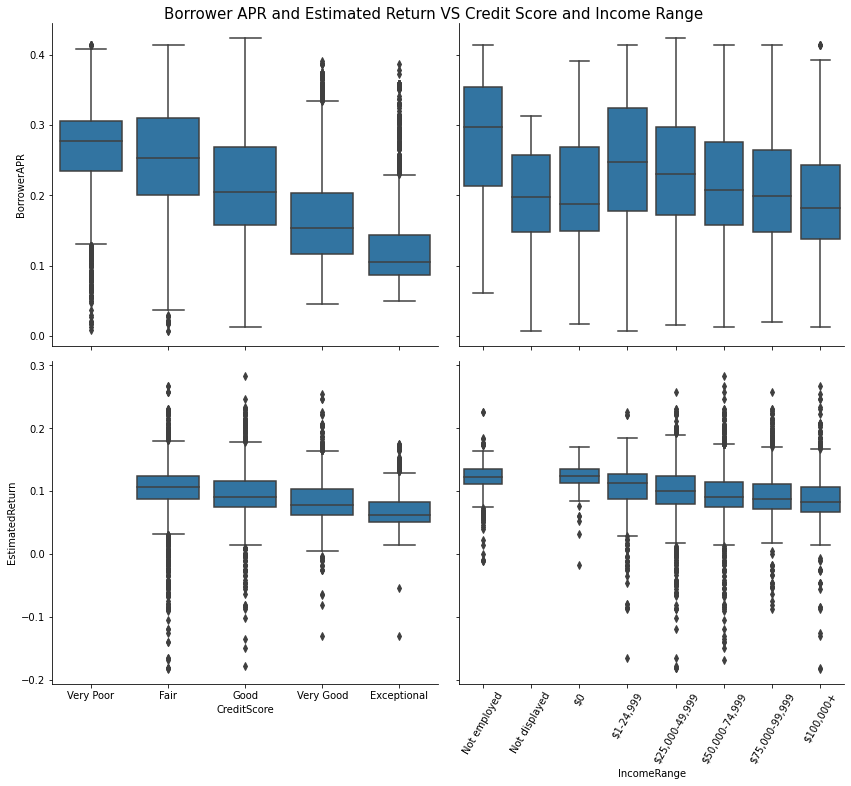

In [26]:
# Boxplot function
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

# Create visualization
plt.figure(figsize = [18, 10])
g = sb.PairGrid(data = df, y_vars = ['BorrowerAPR', 'EstimatedReturn'], x_vars = ['CreditScore', 'IncomeRange'],
                height = 5, aspect = 1.2)
g.map(boxgrid)
plt.suptitle('Borrower APR and Estimated Return VS Credit Score and Income Range', fontsize = 15, y = 1)
plt.xticks(rotation = 60);

APR is the same for all loan durations. Returns on the other hand increase with loan duration.

 <h2><a id='Multivariate'>Multivariate Plots Section, Analysis</a><h2>

<BR>BorrowerAPR and EstematedReturn VS Term
<BR>Are there features that strengthen each other in terms of looking at our features of interest?


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1296x1080 with 0 Axes>

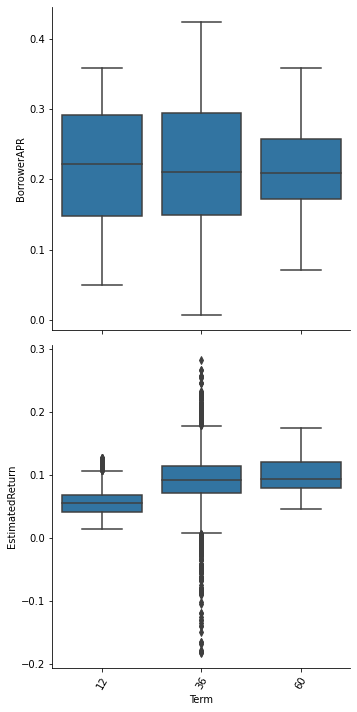

In [27]:
plt.figure(figsize = [18, 15])
g = sb.PairGrid(data = df, x_vars = ['Term'], y_vars = ['BorrowerAPR', 'EstimatedReturn'],
                height = 5, aspect = 1)
g.map(boxgrid)
plt.xticks(rotation = 60)
plt.show();

We saw that the duration of the loan term seemed to have a high impact on returns. Let's have a look of how much difference it makes when comparing different listing categories.

## Estimated Return Analysis

#### Estimated Return VS Listing Category and Term

In [28]:
# Create Dataframes where employment status is full time and not employed to compare both
df2_topcategories_fulltime = df2_topcategories[df2_topcategories['EmploymentStatus'] == "Full-time"]
df2_topcategories_notemployed = df2_topcategories[df2_topcategories['EmploymentStatus'] == "Not employed"]

<h3>Estimated Return VS Listing Category and Term</h3><br>
While there are ethical considerations at play(where some of borrowers need a loan to cover thier basic needs which increase his debit and not help at all), loans from unemployed people are yield more returns on average particularly in the home improvement, auto, and vacation category. That said, one listing category yields higher returns than any other category for fulltime employees: vacation

**Insight :** A 60 month term loan in the vacation category for a full time employee is the best investment I found in this analysis.

<ipython-input-34-2e24d793cc95>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels([0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16])
<ipython-input-34-2e24d793cc95>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels([0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16])


Text(0.5, 0.98, 'Estimated Return based on listing category and term length')

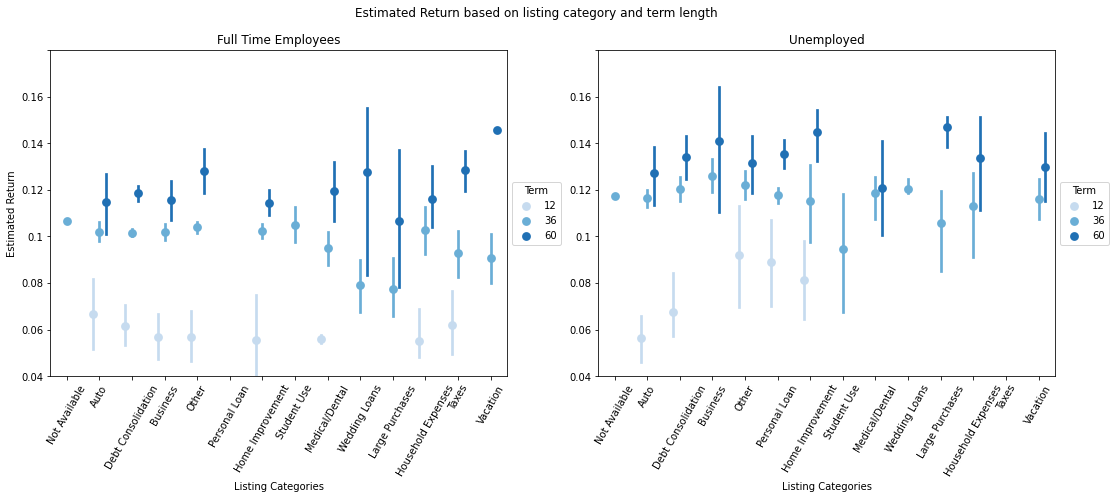

In [34]:
fig, ax = plt.subplots(ncols = 2, figsize = [18,6])

# plot figure 1
sb.pointplot(data = df2_topcategories_fulltime, x = 'ListingCategory', y = 'EstimatedReturn',  hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[0])

ax[0].set_title('Full Time Employees')
ax[0].set_xlabel('Listing Categories')
ax[0].set_ylabel('Estimated Return')
ax[0].set_yticklabels([0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16])
ax[0].set_xticklabels(rotation = 60, labels = df2_topcategories_fulltime.ListingCategory.unique())
ax[0].set_ylim(0.04, 0.18)
# plot legend outside of figure
ax[0].legend(loc='center left', title='Term', bbox_to_anchor=(1, 0.5))

# plot figure 2
sb.pointplot(data = df2_topcategories_notemployed, x = 'ListingCategory', y = 'EstimatedReturn',  hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[1])

ax[1].set_title('Unemployed')
ax[1].set_xlabel('Listing Categories')
ax[1].set_ylabel(' ')
ax[1].set_yticklabels([0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16])
ax[1].set_xticklabels(rotation = 60, labels = df2_topcategories_fulltime.ListingCategory.unique())
ax[1].set_ylim(0.04, 0.18)
# plot legend outside of figure
ax[1].legend(loc='center left', title='Term', bbox_to_anchor=(1, 0.5))
plt.suptitle('Estimated Return based on listing category and term length')

<h3>Estimated Return VS Loan Amount and Term Length</h3><br>
Loans over 6000\$ and that have a term of 60 months yield the highest returns on average.

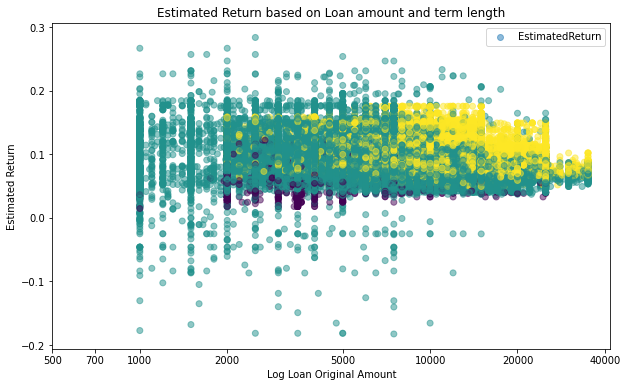

In [30]:
# Create a new column that has the log values of 'LoanOriginalAmount'
df['log_loan_amount'] = df['LoanOriginalAmount'].apply(log_trans)

# Create visualization
plt.figure(figsize = [10, 6])
ticks = [500, 700, 1000, 2000, 5000, 10000, 20000, 40000]

plt.scatter(data = df, x= 'log_loan_amount', y = 'EstimatedReturn', c = 'Term', alpha = 0.5);

plt.xticks(log_trans(np.array(ticks)), ticks)
plt.xlabel('Log Loan Original Amount')
plt.ylabel('Estimated Return')
plt.title('Estimated Return based on Loan amount and term length')
plt.legend()

<h3>Borrower APR VS Credit Score and Term</h3><br>
Lower credit scores correlate with higher APR. As the loan amount increases, the APR lowers as well. It's also interesting to see that for the "Very Poor" credit score category there are not 60 month term loans.

**Insight:** Longer term loans have on average lower APR.

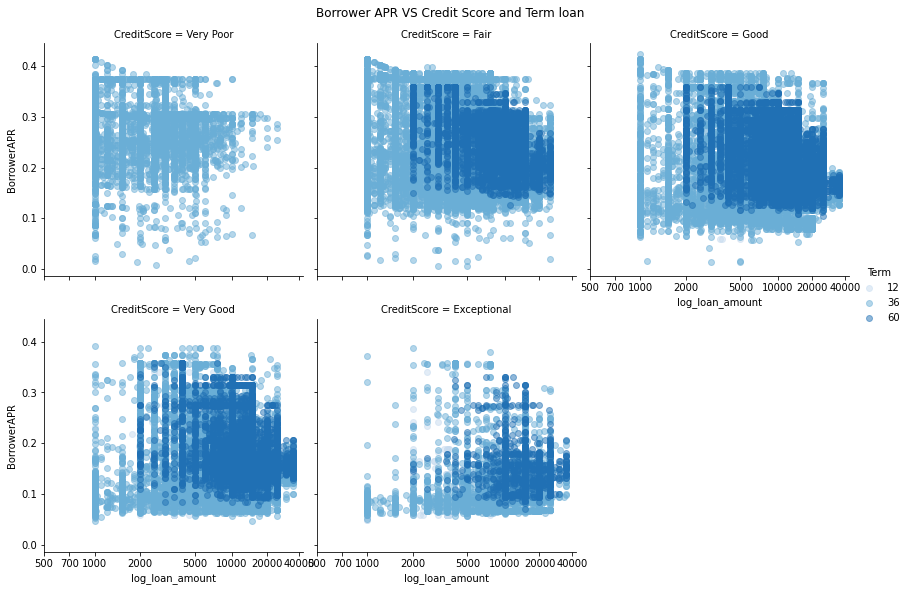

In [31]:

# plot the figure

g = sb.FacetGrid(data = df, col = 'CreditScore', hue = 'Term', col_wrap = 3, height =4 , aspect = 1, palette = 'Blues')
g.map(plt.scatter, 'log_loan_amount','BorrowerAPR', alpha = 1/2)

g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [500, 700, 1000, 2000, 5000, 10000, 20000, 40000]
g.set(xticks = log_trans(np.array(x_ticks)), xticklabels = x_ticks)
plt.suptitle('Borrower APR VS Credit Score and Term loan', y = 1.02)
g.add_legend()

<h3>Borrower APR VS Listing Categories and Term</h3><br>
The lowest rates are for the 12 month term loan in home improvement, vacation and large purchases.

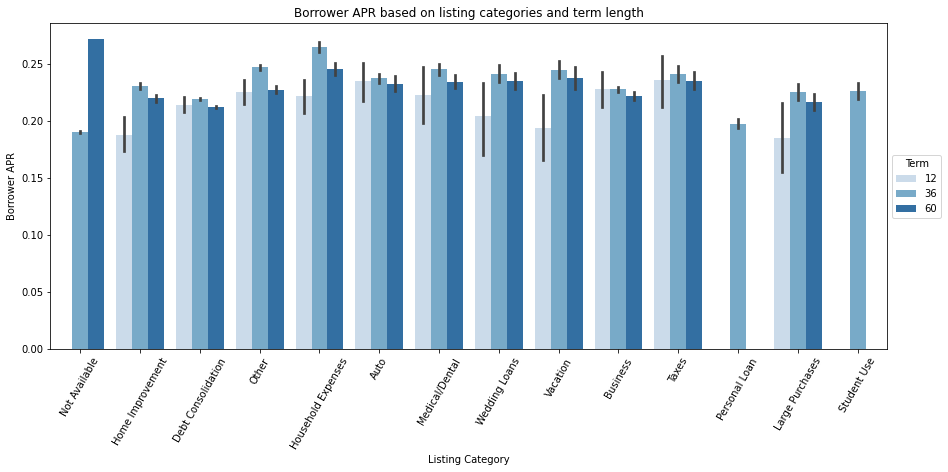

In [32]:
fig = plt.figure(figsize = [15,6])
ax = sb.barplot(data = df2_topcategories, x = 'ListingCategory', y = 'BorrowerAPR',  hue = 'Term', palette = 'Blues')
plt.title('Borrower APR based on listing categories and term length')
plt.xlabel('Listing Category')
plt.ylabel('Borrower APR')
plt.xticks(rotation = 60)
ax.legend(loc='center left', title='Term', bbox_to_anchor=(1, 0.5))
plt.show();

In [33]:
# Note
# Term             : The length of the loan expressed in months.
# BorrowerAPR      : The Borrower's Annual Percentage Rate (APR) for the loan.
# Listing Category : The category of the listing that the borrower selected when posting their listing